## <center>Python Solution</center>

In [3]:
data.head()

,Customer,Default,card_class,Gender,Education,Marital_Status,Age,Credit_Limit,Jun_Status,May_Status,Apr_Status,Mar_Status,Feb_Status,Jan_Status,Jun_Bill,May_Bill,Apr_Bill,Mar_Bill,Feb_Bill,Jan_Bill,Jun_Payment,May_Payment,Apr_Payment,Mar_Payment,Feb_Payment,Jan_Payment,Jun_PayPercent,May_PayPercent,Apr_PayPercent,Mar_PayPercent,Feb_PayPercent,Jan_PayPercent
0,1,1,1,2.0,2.0,1,24.0,700,2,2,-1,-1,-2,-2,133.82,106.09,23.56,0.00,0.00,0.00,0.00,23.56,0.00,0.00,0.00,0.00,0.0000,0.2221,0.0000,1.0000,1.0000,1.0000
1,2,0,2,2.0,2.0,2,26.0,4100,-1,2,0,0,0,2,91.72,59.00,91.72,111.90,118.16,111.53,0.00,34.20,34.20,34.20,0.00,68.40,0.0000,0.5797,0.3729,0.3056,0.0000,0.6133
2,3,0,2,2.0,2.0,2,34.0,3100,0,0,0,0,0,0,999.97,479.72,463.72,490.12,511.22,531.78,51.92,51.30,34.20,34.20,34.20,171.00,0.0519,0.1069,0.0738,0.0698,0.0669,0.3216
3,4,0,1,2.0,2.0,1,37.0,1700,0,0,0,0,0,0,1607.06,1649.57,1685.75,968.34,990.40,1010.51,68.40,69.05,41.04,37.62,36.56,34.20,0.0426,0.0419,0.0243,0.0388,0.0369,0.0338
4,5,0,1,1.0,2.0,1,57.0,1700,-1,0,-1,0,0,0,294.70,193.91,1225.56,716.15,654.79,654.28,68.40,1254.49,342.00,307.80,23.56,23.22,0.2321,1.0000,0.2791,0.4298,0.0360,0.0355


# Data Pre-Processing

We will explore the data first and will try to modify the variables that make more sense in the dataset. Let's first look at the bar graphs of variables 'Education' and 'Marital_Status'.

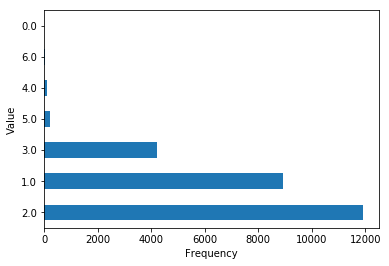

In [12]:
barplot('Education')

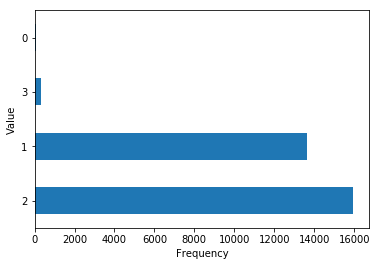

In [13]:
barplot('Marital_Status')

Bar graphs reveal that some classes in columns 'Education' and 'Marital_Status' occur far more less frequently than its counterparts. So, we can bin these less frequent observations into a new value. 

1. Observations having value 0,5,6 under Education column can be clubbed together into the value 4.
2. Observations having value 0,3 under 'Marital_Status'column can be clubbed together into the value 3. 

Binning reduces the final number of columns in the dataframe without much loss of information.

The 'Age' column is similarly binned into 6 factors as follows:

Age>=20 and Age<30 = 1

Age>=30 and Age<40 = 2

Age>=40 and Age<50 = 3

Age>=50 and Age<60 = 4

Age>=60 and Age<70 = 5

Age>=70 and Age<81 = 6

The column 'Credit_Limit' can be seen is skewed towards the right. To handle this skewness the variable is transformed using a log transformation, which makes it evenly distributed.

The histogram that are plotted below are good visualiztions of the original skewness and normalization after transformation.

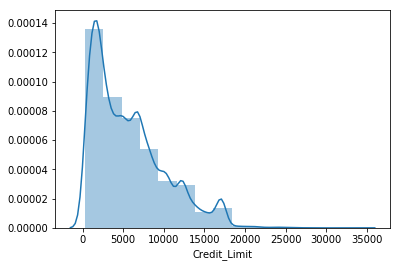

In [19]:
sns.distplot(data['Credit_Limit'], bins=15);

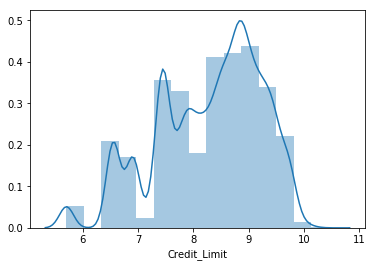

In [20]:
sns.distplot(np.log(data['Credit_Limit']+1), bins=15);  ## After applying Log transformation

The following step replaces, imputes and performs one-hot encoding using the ReplaceImputeEncode class.

Also, log transformation is applied on the 'Credit_Limit' column to deal with its skewness.

<br>
Now to improve the quality of prediction, we have to deal with columns which have a high correlation amongst themselves.

To check which all columns have high correlation we plot the Pearson correlation matrix.
<br>

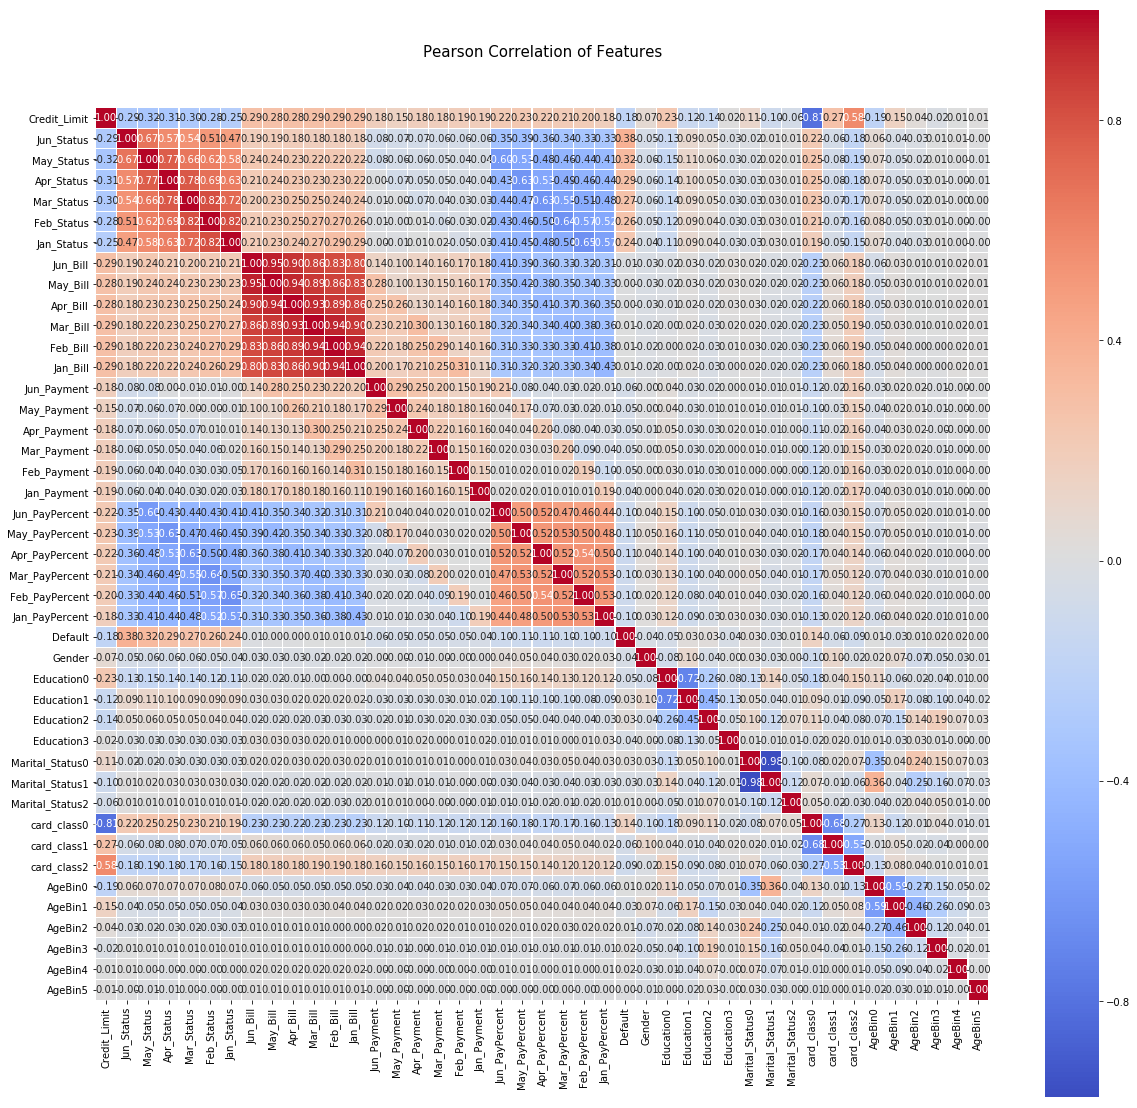

In [28]:
CorrelationPlot(encoded_df)

Looking at the correlation between the variabls using the correlation matrix, we can see that following variables seem to be correlated to each other :

1. card_class0 and card_class2 with Credit_Limit
2. Marital_Status0 with Marital_Status1
3. May_Status, Apr_Status, Mar_Status, Feb_Status, Jan_Status with Jun_Status, May_Status, Apr_Status, Mar_Status, Feb_Status      respectively.
4. Education0 with Education1 and Education2
5. AgeBin0 with AgeBin1
6. Every month Bill is related with the last month's bill.

So, we can safely drop the above variables without affected the accuracy of the predictive models.


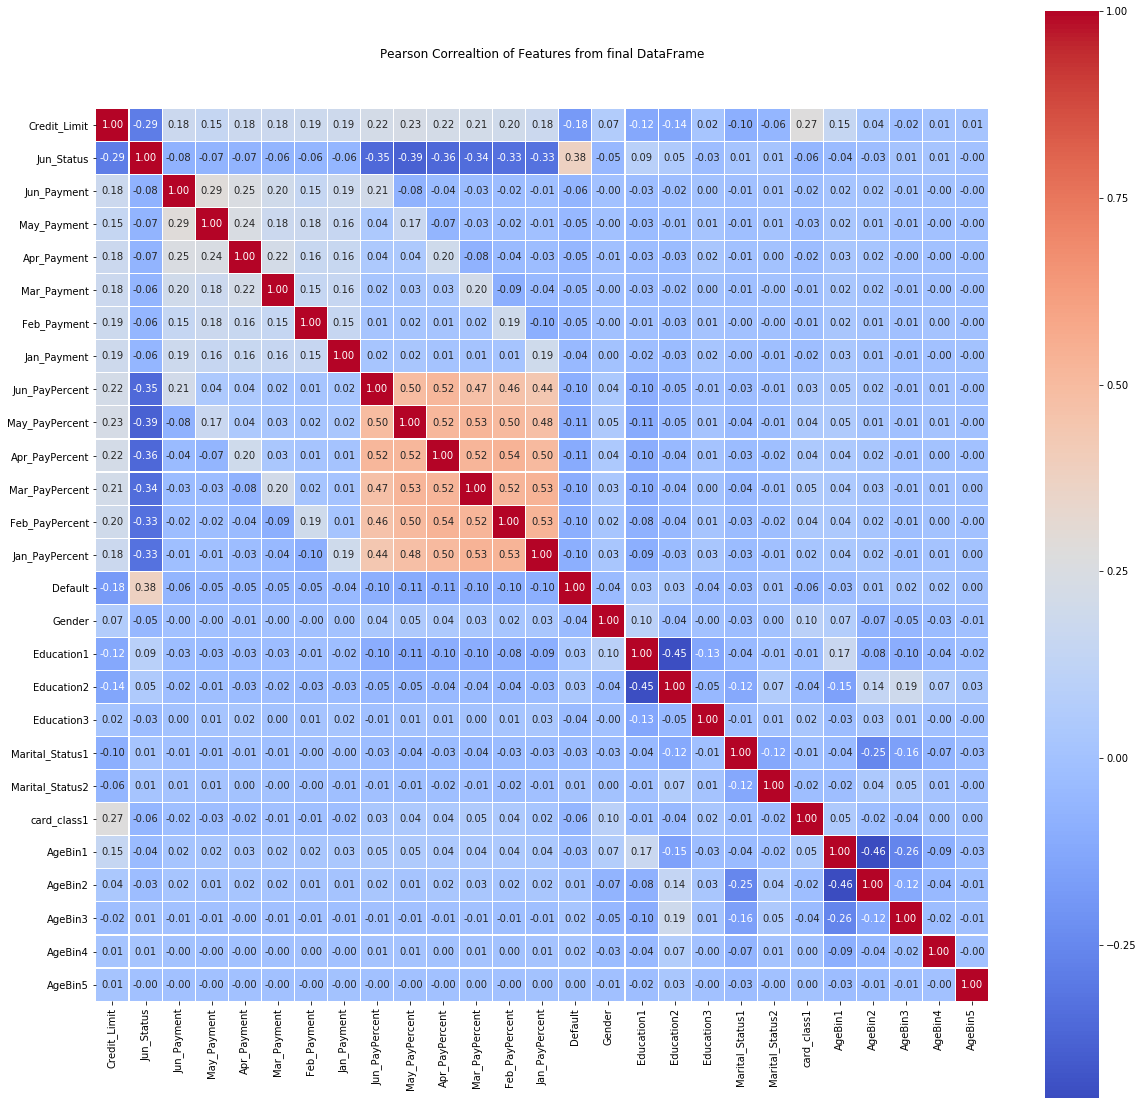

In [29]:
CorrelationPlot(encoded_df1)
plt.title('Pearson Correaltion of Features from final DataFrame')
plt.show();

# Prediction Model Building

Now, we will first perform cross validation on Logistic Regression, Random Forest, Decision Tree and Neural Networks to optimize the hyperparameters.

Since, the target variable in our dataset is unbalanced with 5000 default cases as opposed to 25000 non-defaulters, we will use class_weight='Balanced' in Logistic Regression, Random Forest and Decision Tree and this can be seen in the cross validated result of these three models below. 

We will cross-validate Logistic Regression using two different solvers i.e 'sag' and 'newton-cg' and see which solver reach the local minima first.

In Random Forest, we will cross-validate using different number of tree and maximum number of features.

In Decision tree, we will identify the best max_depth.

And in Neural networks, we will cross-validate on different number of hidden layers and perceptrons.

In [41]:
## Splitting data into 70% training and 30% validation
X_train, X_validate, y_train, y_validate = train_test_split(X,y,test_size = 0.3, random_state=7) 

### 1. Logistic Regression

In [31]:
## Cross-validation on Logistic Regression for two different Class weights:
LR()

Class Weight:  None
accuracy..... 0.8595    0.0047
recall....... 0.2429    0.0342
precision.... 0.6886    0.0410
f1........... 0.3576    0.0368
Class Weight:  balanced
accuracy..... 0.7595    0.0251
recall....... 0.6790    0.0370
precision.... 0.3705    0.0347
f1........... 0.4786    0.0327


('Best class weight: ', 'balanced')

In [21]:
## Validating on the test data
print("\nTraining Data\nRandom Selection of 70% of Original Data")
logreg.display_binary_split_metrics(lgr_train, X_train, y_train, \
                                    X_validate, y_validate)


Training Data
Random Selection of 70% of Original Data


Model Metrics..........       Training     Validation
Observations...........          21000           9000
Coefficients...........             27             27
DF Error...............          20973           8973
Mean Absolute Error....         0.3775         0.3827
Avg Squared Error......         0.1813         0.1864
Accuracy...............         0.7578         0.7540
Precision..............         0.3704         0.3536
Recall (Sensitivity)...         0.6890         0.6711
F1-score...............         0.4818         0.4631
MISC (Misclassification)...      24.2%          24.6%
     class 0...............      22.9%          23.0%
     class 1...............      31.1%          32.9%


Training
Confusion Matrix  Class 0   Class 1  
Class 0.....     13550      4019
Class 1.....      1067      2364


Validation
Confusion Matrix  Class 0   Class 1  
Class 0.....      5831      1746
Class 1.....       468       955


### 2. Random Forest Classifier

In [38]:
## Cross-validation on Random Forest for two different trees and Max number of features
RF()


Number of Trees:  10  Max_features:  auto
Metric.......  Mean    Std. Dev.
accuracy..... 0.8672    0.0065
recall....... 0.3441    0.0382
precision.... 0.6784    0.0477
f1........... 0.4550    0.0354

Number of Trees:  10  Max_features:  0.3
Metric.......  Mean    Std. Dev.
accuracy..... 0.8701    0.0075
recall....... 0.3616    0.0296
precision.... 0.6895    0.0506
f1........... 0.4737    0.0323

Number of Trees:  10  Max_features:  0.5
Metric.......  Mean    Std. Dev.
accuracy..... 0.8690    0.0064
recall....... 0.3657    0.0204
precision.... 0.6787    0.0481
f1........... 0.4745    0.0213

Number of Trees:  10  Max_features:  0.7
Metric.......  Mean    Std. Dev.
accuracy..... 0.8711    0.0072
recall....... 0.3778    0.0214
precision.... 0.6870    0.0504
f1........... 0.4869    0.0247

Number of Trees:  15  Max_features:  auto
Metric.......  Mean    Std. Dev.
accuracy..... 0.8715    0.0073
recall....... 0.3976    0.0366
precision.... 0.6778    0.0499
f1........... 0.4997    0.0315

Nu

In [45]:
## Validating on the test data
print("\nTraining Data\nRandom Selection of 70% of Original Data")
DecisionTree.display_binary_split_metrics(rfc_train, X_train, y_train, \
                                              X_validate, y_validate)
DecisionTree.display_importance(rfc, encoded_df1.columns)


Training Data
Random Selection of 70% of Original Data


Model Metrics..........       Training     Validation
Observations...........          21000           9000
Features...............             26             26
Maximum Tree Depth.....             10             10
Minimum Leaf Size......              1              1
Minimum split Size.....              2              2
Mean Absolute Error....         0.2372         0.2759
Avg Squared Error......         0.0925         0.1265
Accuracy...............         0.9001         0.8533
Precision..............         0.6693         0.5333
Recall (Sensitivity)...         0.7686         0.5791
F1-score...............         0.7155         0.5553
MISC (Misclassification)...      10.0%          14.7%
     class 0...............       7.4%           9.5%
     class 1...............      23.1%          42.1%


Training
Confusion Matrix  Class 0   Class 1  
Class 0.....     16266      1303
Class 1.....       794      2637


Validation
Conf

### 3. Decision Tree Classifier

In [48]:
## Cross-validation on Decision Tree with different max_depth
DTC()

For max_depth= 5
Metric.......  Mean    Std. Dev.
accuracy..... 0.8734    0.0072
recall....... 0.4312    0.0348
precision.... 0.6713    0.0460
f1........... 0.5238    0.0285
For max_depth= 6
Metric.......  Mean    Std. Dev.
accuracy..... 0.8734    0.0078
recall....... 0.4357    0.0253
precision.... 0.6684    0.0430
f1........... 0.5268    0.0265
For max_depth= 7
Metric.......  Mean    Std. Dev.
accuracy..... 0.8720    0.0071
recall....... 0.4353    0.0326
precision.... 0.6599    0.0379
f1........... 0.5238    0.0300
For max_depth= 8
Metric.......  Mean    Std. Dev.
accuracy..... 0.8718    0.0067
recall....... 0.4407    0.0322
precision.... 0.6552    0.0368
f1........... 0.5266    0.0266
For max_depth= 10
Metric.......  Mean    Std. Dev.
accuracy..... 0.8643    0.0085
recall....... 0.4499    0.0322
precision.... 0.6132    0.0428
f1........... 0.5170    0.0269
For max_depth= 12
Metric.......  Mean    Std. Dev.
accuracy..... 0.8555    0.0097
recall....... 0.4434    0.0421
precision.... 0.

In [50]:
## Validating on the test data
print("\nTable of the metrics for 70/30 split")
DecisionTree.display_binary_split_metrics(dtc_train, X_train,y_train,X_validate, y_validate)


Table of the metrics for 70/30 split


Model Metrics..........       Training     Validation
Observations...........          21000           9000
Features...............             26             26
Maximum Tree Depth.....              6              6
Minimum Leaf Size......              5              5
Minimum split Size.....              5              5
Mean Absolute Error....         0.3211         0.3320
Avg Squared Error......         0.1506         0.1619
Accuracy...............         0.8242         0.8048
Precision..............         0.4738         0.4223
Recall (Sensitivity)...         0.6843         0.6374
F1-score...............         0.5599         0.5080
MISC (Misclassification)...      17.6%          19.5%
     class 0...............      14.8%          16.4%
     class 1...............      31.6%          36.3%


Training
Confusion Matrix  Class 0   Class 1  
Class 0.....     14961      2608
Class 1.....      1083      2348


Validation
Confusion Matrix  Clas

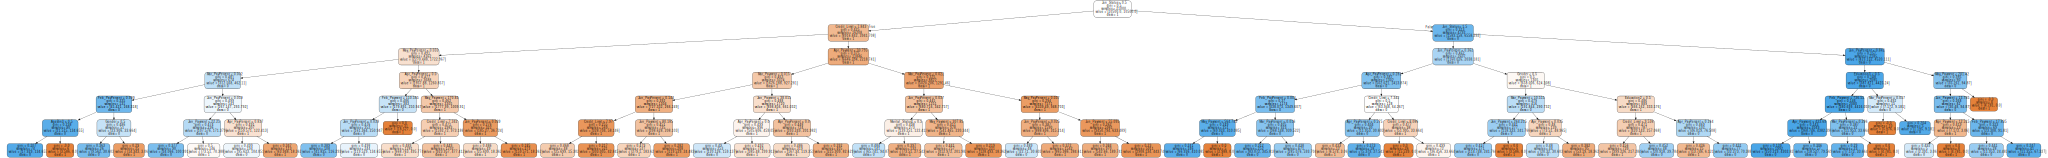

In [82]:
dtc_graph()

### Neural Networks

In [52]:
## Cross validation on Neural Networks with different number of hidden layers and perceptrons.

NN()


Network:  3
Metric.......  Mean    Std. Dev.
Metric.......  Mean    Std. Dev.
accuracy..... 0.8593    0.0113
recall....... 0.2974    0.1481
precision.... 0.6547    0.0648
f1........... 0.3836    0.1408

Network:  11
Metric.......  Mean    Std. Dev.
Metric.......  Mean    Std. Dev.
accuracy..... 0.8690    0.0088
recall....... 0.3999    0.1027
precision.... 0.6602    0.0308
f1........... 0.4870    0.1022

Network:  (5, 4)
Metric.......  Mean    Std. Dev.
Metric.......  Mean    Std. Dev.
accuracy..... 0.8690    0.0110
recall....... 0.4131    0.0939
precision.... 0.6474    0.0464
f1........... 0.4981    0.0902

Network:  (6, 5)
Metric.......  Mean    Std. Dev.
Metric.......  Mean    Std. Dev.
accuracy..... 0.8701    0.0097
recall....... 0.4194    0.0929
precision.... 0.6584    0.0436
f1........... 0.5040    0.0852

Network:  (7, 6)
Metric.......  Mean    Std. Dev.
Metric.......  Mean    Std. Dev.
accuracy..... 0.8670    0.0123
recall....... 0.4193    0.1310
precision.... 0.6420    0.0508


In [55]:
## Validating on the test data.
print("\nTable of the metrics for 70/30 split")
NeuralNetwork.display_binary_split_metrics(bestfnn, X_train, y_train,\
                             X_validate, y_validate)


Table of the metrics for 70/30 split


Model Metrics..........       Training     Validation
Observations...........          21000           9000
Features...............             26             26
Number of Layers.......              2              2
Number of Outputs......              1              1
Number of Weights......            203            203
Activation Function....       logistic       logistic
Mean Absolute Error....         0.2487         0.2496
Avg Squared Error......         0.1243         0.1257
Accuracy...............         0.8488         0.8458
Precision..............         0.6861         0.5660
Recall (Sensitivity)...         0.1370         0.1054
F1-score...............         0.2284         0.1777
MISC (Misclassification)...      15.1%          15.4%
     class 0...............       1.2%           1.5%
     class 1...............      86.3%          89.5%


Training
Confusion Matrix  Class 0   Class 1  
Class 0.....     17354       215
Class 1.....  

### ROC Curves

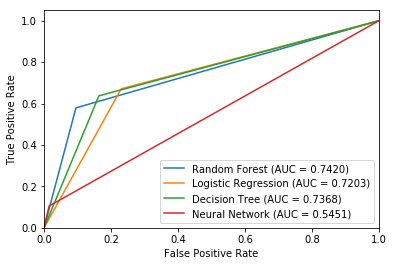

In [80]:
roc_curves()

From the ROC curve above, we can see that Random Forest has the highest Area under the curve followed by Decision tree an logistic regression.

### RESULTS:

We predicted on 4 different models i.e. Logistic Regression, Random Forest, Decision trees and Neural Networks.

1. Even though area under the curve for Random Forest and Decision trees are higher than Logistic Regression, Logistic Regression has higher sensitivity than both of the models at 67% as compared to 58% and 63%. 
2. It would seem logical for banks to correctly identify the number of defaulters as opposed to just reducing the misclassification rate. Even a slight decrease in accuracy to improve the sensitivity is warranted.
3. In our predictions, Neural Networks performed poorly in correctly identifying the number of true defaulters.
4. Decision trees and Logistic regression are both close in accuracy and sensitivity, it would depend on the cost associated with correctly identifying the true defaulters, so there is no best model in our case.